# 4. Exploratory Data Analysis

**탐색적 데이터 분석을 통해 데이터를 통달해봅시다.** with [Titanic Data](https://www.kaggle.com/c/titanic)

**데이터 그 자체**만으로부터 Insight를 얻어내는 방법

0. 라이브러리 준비
1. 분석의 목적과 변수 확인
2. 데이터 전체적으로 살펴보기 (상관관계나 NA 값들 처리...)
3. 데이터의 개별 속성 파악하기

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width: 90% !important; }</style>"))

## 0. 라이브러리 준비

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. 분석의 목적과 변수 확인

### 분석의 목적 : 살아남은 사람들은 어떤 특징이 있었는가?

In [4]:
titanic_df = pd.read_csv("./train.csv")

titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### NaN 같은 결측치는 어떻게 할까?

In [5]:
# 각 column의 데이터 타입 확인하기

titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 2. 데이터 전체적으로 살펴보기

In [6]:
# 데이터 전체 정보를 얻는 함수 : .describe()

titanic_df.describe() # 수치형 데이터에 대한 요약만을 제공한다!! Sex나 Name같은 수치형 데이터 아닌 속성은 안나온다

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


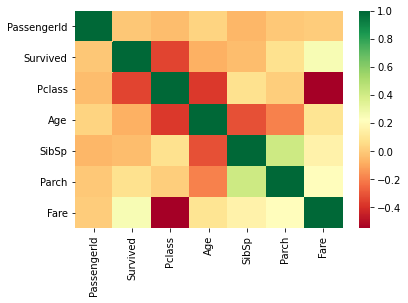

In [7]:
# 상관계수 확인

sns.heatmap(titanic_df.corr(), cmap = "RdYlGn")
plt.show()

# Correlation is NOT Causation

# 상관성과 인과성은 다르다

PClass와 Fare는 음의 상관관계가 보이고..
Parch와 SibSp 는 야간의 양의 상관관계가 보인다..

In [8]:
# 결측치 확인

titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age랑 Cabin은 결측치가 많은 편인 것 같다.

## 3. 데이터의 개별 속성 파악하기

### 생존자, 사망자

In [9]:
# 일단 목표에 해당하는 생존자와 사망자 속성을 한번 보자

titanic_df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

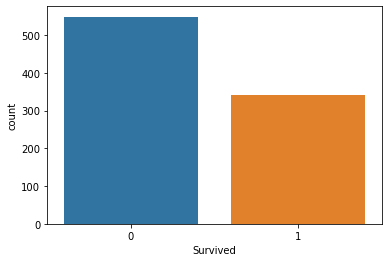

In [10]:
# 생존자 수와 사망자 수를 Barplot으로 그려보자

sns.countplot(x = "Survived", data = titanic_df)
plt.show()

### Pclass

In [11]:
# Pclass에 따른 인원 파악

# Survived가 1이면 생존이므로 sum()을 하면 생존자 수를 구해낼 수 있다
# mean()을 하면 생존자 비율을 알 수 있다!
titanic_df[["Pclass", "Survived"]].groupby(["Pclass"]).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


### 확실히 Pclass가 낮으면 많이 생존했다... Heatmap으로도 한번 더 봐보자

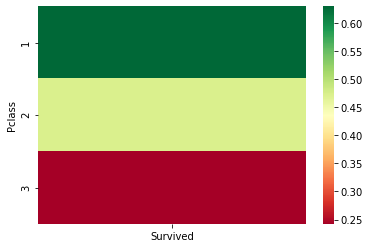

In [12]:
sns.heatmap(titanic_df[["Pclass", "Survived"]].groupby(["Pclass"]).mean(), cmap = "RdYlGn")
plt.show()

### Sex

In [13]:
titanic_df.groupby(["Survived", "Sex"])["Survived"].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

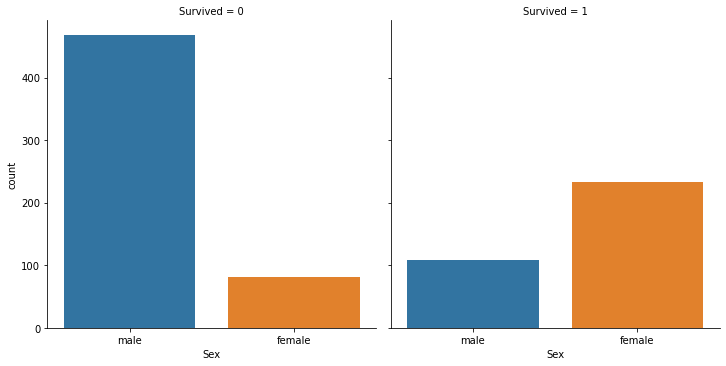

In [14]:
# sns.catplot

sns.catplot(x = "Sex", col = "Survived", kind = "count", data = titanic_df)
plt.show()

남자가 훨씬 더 많이 죽었다....

### Age : 이건 전에 봤을 때 결측치가 존재했었다

In [15]:
titanic_df.describe()["Age"]

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

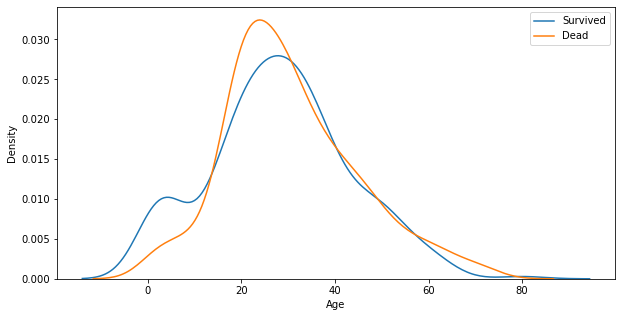

In [16]:
# Survived 1, 0 과 Age의 경향성

# subplot의 인자 3개는 가로몇개, 세로 몇개의 그래프를 그릴건지, figsize는 사이즈
# 중첩해서 그릴 의도이기 때문에 동일한 ax에 그린다
fig, ax = plt.subplots(1, 1, figsize = (10, 5)) 
sns.kdeplot(x = titanic_df[titanic_df["Survived"] == 1]["Age"], ax = ax)
sns.kdeplot(x = titanic_df[titanic_df["Survived"] == 0]["Age"], ax = ax)

# 중첩해서 그렸으니.. 범례를 넣으면 더 깔끔할 것 같다!
plt.legend(["Survived", "Dead"])

plt.show()

유아들은 그래도 비율적으로 좀 더 생존했고, 청년층은 더 사망했다...

### Appendix 1. Sex + Pclass vs Survived

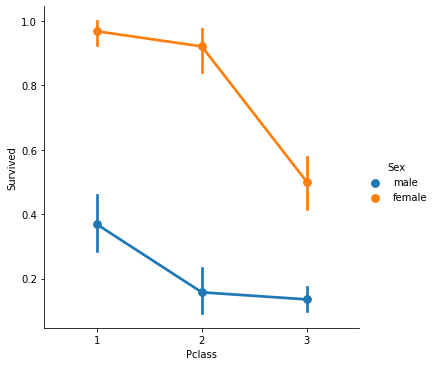

In [17]:
# 점은 추정치, 점에 겹친 세로 직선은 신뢰구간을 의미한다
# hue는 다른 범주형 변수로 나눠줄 수 있게하는 param
sns.catplot(x = "Pclass", y = "Survived", hue = "Sex", kind = "point", data = titanic_df)
plt.show()

### Appendix 1. Sex + Pclass vs Survived

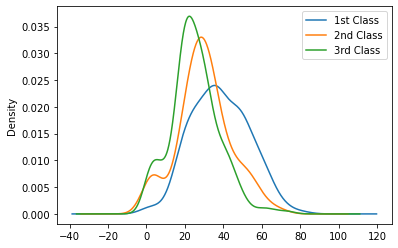

In [18]:
# Age graph with Pclass

titanic_df["Age"][titanic_df["Pclass"] == 1].plot(kind = "kde")
titanic_df["Age"][titanic_df["Pclass"] == 2].plot(kind = "kde")
titanic_df["Age"][titanic_df["Pclass"] == 3].plot(kind = "kde")

plt.legend(["1st Class", "2nd Class", "3rd Class"])
plt.show()

## Mission : It's Your Turn!

### 1. 본문에서 언급된 Feature를 제외하고 유의미한 Feature를 1개 이상 찾아봅시다.

- Hint : Fare? Sibsp? Parch?

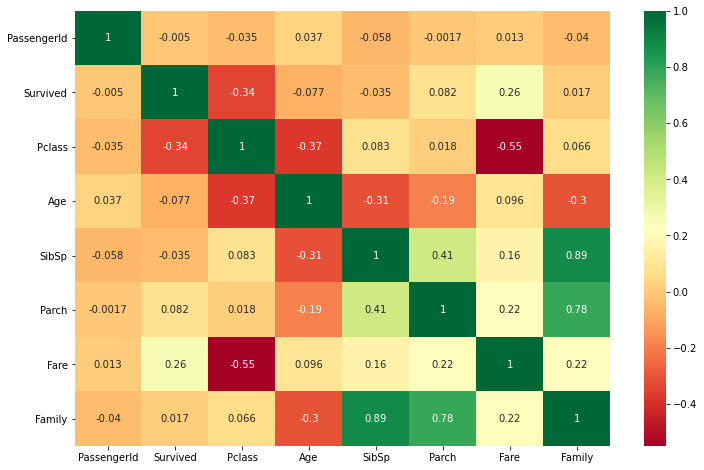

In [178]:
### 일단 전반적으로 한번 상관관계를 더 봐보자

plt.figure(figsize = (12, 8))
sns.heatmap(titanic_df.corr(), cmap = "RdYlGn", annot = True)
plt.show()

생존자에 대해서 어떤 속성이 영향이 있는 것인지 궁금하니까 **Survived** 속성 위주로 살펴보면.. <br>
일단 제일 하얘보이는 Fare는 Survived랑 크게 관계가 없어보인다

In [20]:
# 데이터도 한번 다시 띄워서 보고..

titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


그럼 Fare를 제외하고 가설을 세워보자...
SibSp가 형제 자매고, Parch가 부모 자식 관계의 배 승선 인원 수이니까...
둘다 많으면 가족 다 같이 탔다고 볼 수 있지 않을까(대가족)?
아마 배가 침몰하는 상황이니.. 대가족이면 챙겨야할 사람이 많으니 아마 생존율이 낮았을거 같은데..

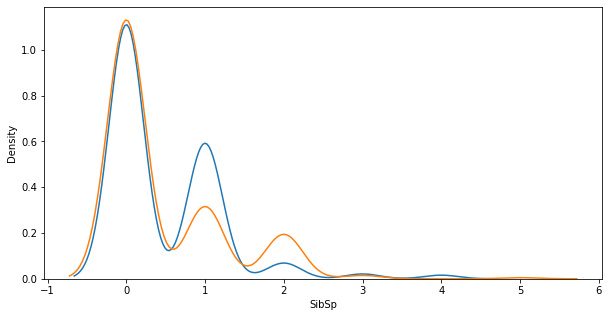

In [21]:
fig, ax = plt.subplots(1, 1, figsize = (10, 5)) 
sns.kdeplot(x = titanic_df[titanic_df["Survived"] == 1]["SibSp"], ax = ax)
sns.kdeplot(x = titanic_df[titanic_df["Survived"] == 1]["Parch"], ax = ax)

plt.show()

확실히 SibSp와 Parch는 서로 Survived에 대해 비슷한 관계를 갖는 것 같아 보인다. <br> 
근데 살짝 들쭉 날쭉한데... 보니까 보정을 조금 해주면 될거 같다

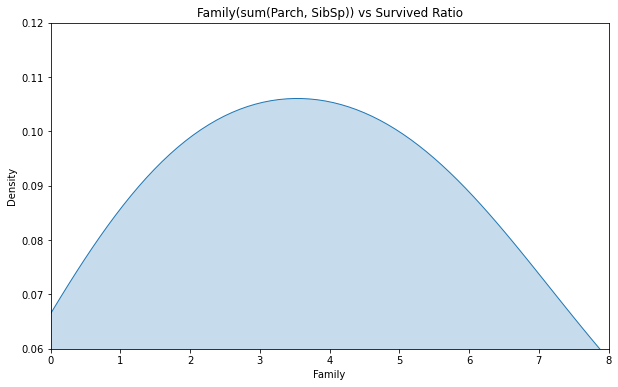

In [22]:
titanic_df["Family"] = (titanic_df["SibSp"] + titanic_df["Parch"])
titanic_by_family = titanic_df[["Family", "Survived"]].groupby(["Family"]).mean()

plt.figure(figsize = (10, 6))
sns.kdeplot(titanic_by_family.index, shade = True)
plt.title("Family(sum(Parch, SibSp)) vs Survived Ratio")
plt.axis([0, 8, 0.06, 0.12]) # [x_min, x_max, y_min, y_max]


plt.show()

이 결과를 보니 불규칙 적이지 않은 패턴을 찾을 수 있다. <br>
일단 Family mean은 SibSp과 Parch의 합이다. 형제자매 + 탄 자식이나 부모이니까.. <br>
A라는 사람이 있으면 이 사람과 함께 탄 형제자매 + 부모님이나 자식 = Family mean 이니 <br>
100% 정확한 값은 아니지만 같이 탄 가족구성원 수라고 할 수 있겠다. <br>

- 일단 Family가 3 ~ 4의 값을 가질때 가장 높은 생존율을 보임을 알 수 있다.
- 가장 높은 생존율의 구간인 3 ~ 4에서 작아져도 커져도 생존율은 감소하는 것을 볼 수 있다
- 추측컨대... 0에 가까워 질수록 -> 챙겨주는 사람이 적어 대피에 대한 정보가 적어서 사망했을 수 있겠다..
- Family가 커질 수록 -> 신경써야 될 사람이 많아져서 본인의 생존에 보다 노력할 여유가 적었을 것이다...
- 이 Family Feature를 가지고 이 정도 해석을 할 수 있지 않을까?


### 2. [Kaggle](https://www.kaggle.com/datasets)에서 Dataset을 찾고, 이 Dataset에서 유의미한 Feature를 3개 이상 찾고 이를 시각화해봅시다.

함께 보면 좋은 라이브러리 document
- [numpy]()
- [pandas]()
- [seaborn]()
- [matplotlib]()

#### 무대뽀로 하기 힘들다면? 다음 Hint와 함께 시도해봅시다:
1. 데이터를 톺아봅시다.  
    - 각 데이터는 어떤 자료형을 가지고 있나요?  
    - 데이터에 **결측치**는 없나요? -> 있다면 이를 어떻게 메꿔줄까요?  
    - 데이터의 자료형을 바꿔줄 필요가 있나요? -> 범주형의 One-hot encoding
2. 데이터에 대한 가설을 세워봅시다.
    - 가설은 개인의 경험에 의해서 도출되어도 상관이 없습니다.
    - 가설은 명확할 수록 좋습니다 ex) *Titanic Data에서 Survival 여부와 성별에는 상관관계가 있다!*
3. 가설을 검증하기 위한 증거를 찾아봅시다.
    - 이 증거는 한 눈에 보이지 않을 수 있습니다. 우리가 다룬 여러 Technique를 써줘야합니다.  
    - `.groupby()`를 통해서 그룹화된 정보에 통계량을 도입하면 어떨까요?
    - `.merge()`를 통해서 두개 이상의 dataFrame을 합치면 어떨까요?
    - 시각화를 통해 일목요연하게 보여주면 더욱 좋겠죠?

### Hint!
- 각 데이터의 자료형 파악
- 결측치 처리
- 데이터 자료형을 바꿔줄 필요가 있는가? 범주형의 One-hot encoding
- 가설은 어떻게 도출되어도 상관은 없다
- 가설은 명확할수록 좋다
- 가설은 검증이 필요하다
- `.groupby()` 그룹화된 정보에 통계량 도입, `.merge()` 두 개 이상의 dataFrame을 합칠 수 있다 
- Visualization!

### 심장병에 관한 데이터를 가지고 EDA를 진행해보자

### 나는 심장병 중 Typical Angina와 관계가 깊은 Feature를 알아보고 싶다!

### 심장병 데이터 파일의 변수 설명

- age: The person's age in years
- sex: The person's sex (1 = male, 0 = female)
- cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
- trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
- chol: The person's cholesterol measurement in mg/dl
- fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
- restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
- thalach: The person's maximum heart rate achieved
- exang: Exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
- slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
- ca: The number of major vessels (0-3)
- thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
- target : 0 : Nothing, 1~4 : Same as the cp variable

In [247]:
hd = pd.read_csv("./Heart_Disease/heart.csv")
hd.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [248]:
#일단 한번 전반적으로 어떻게 data가 포진되어 있나 파악 해보자
# col 이름을 좀 더 명확하게 이해하게 바꿔줘야겠다...

hd.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

hd.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [249]:
hd.head(5)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


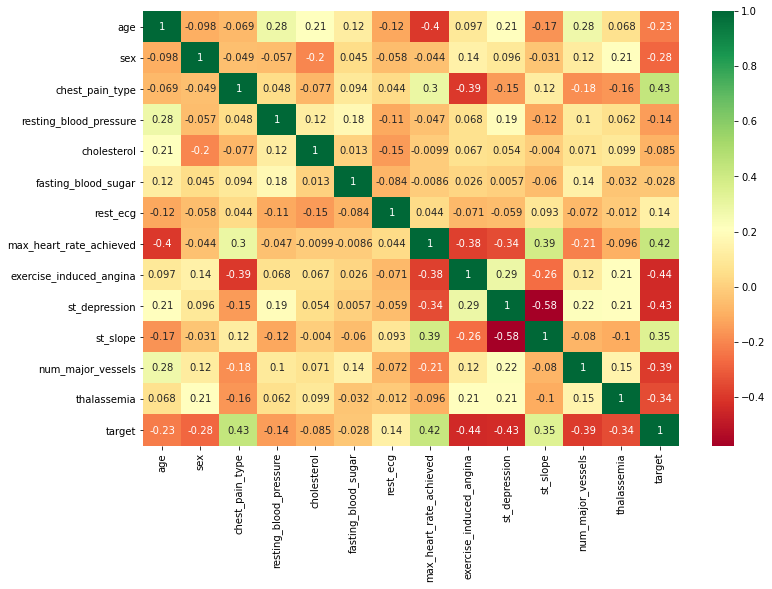

In [253]:
# corr을 heatmap으로 봐본 후, target과 상관관계가 있어보이는 Feature를 찾아보자

#typical angina와 Normal만 추려서 봐보자

hd = hd.loc[((hd['target'] == 0) | (hd['target'] == 1))]
plt.figure(figsize = (12, 8))
sns.heatmap(hd.corr(), cmap = "RdYlGn", annot = True)
plt.show()

보니까... target과 상관관계가 강한 속성들은 보면
`chest_pain_type`과 `exercise_induced_angina` , `st_slope` 은 값이 높지만 제외해야할 것 같다.. <br>
이건 categorical 하니까.. <br>
그럼 나머지 중 알 수 있는 것들은 
- max_heart_rate_achieved
- st_depression
- num_major_vessels
정도가 될 것이다

<ipython-input-263-90d6a5638980>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hd_normalized[i] = (hd_normalized[i] - hd_normalized[i].mean()) / hd_normalized[i].std()


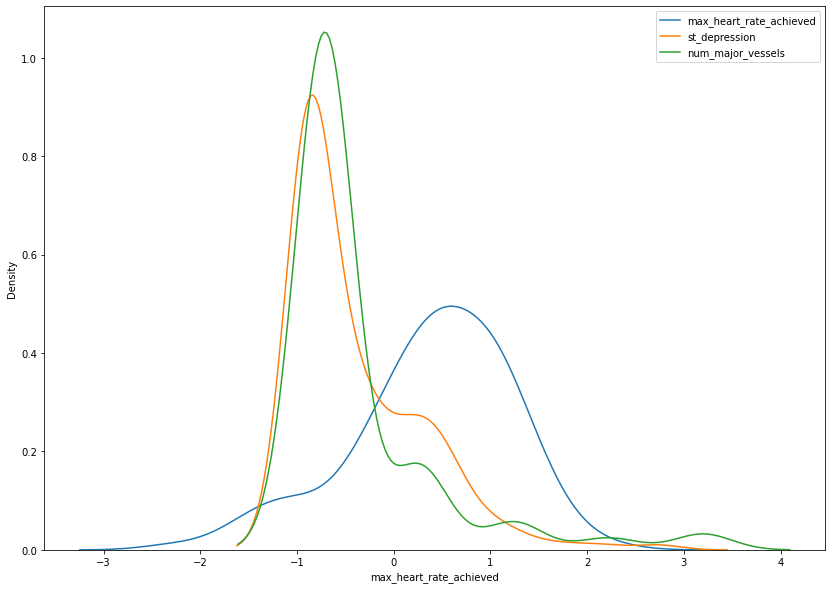

In [263]:
# normalize 한 후 봐볼까?

normalize = ["max_heart_rate_achieved", "st_depression", "num_major_vessels"]
hd_normalized = hd[["max_heart_rate_achieved", "st_depression", "num_major_vessels", "target"]]
for i in normalize:
    hd_normalized[i] = (hd_normalized[i] - hd_normalized[i].mean()) / hd_normalized[i].std()

fig, ax = plt.subplots(1, 1, figsize = (14, 10))

for i in normalize:
    sns.kdeplot(x = hd_normalized[hd_normalized["target"] == 1][i], ax = ax)
plt.legend(normalize)
plt.show()

음... 대략적으로 보면 `st_depression`과 `num_major_vessels`이 좀 비슷한 형태다 <br>
한번 2개의 쌍으로 구성해서 봐보자

<ipython-input-264-c2d16260e304>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hd_normalized["vessels_and_depression"] = (hd_normalized["num_major_vessels"] + hd_normalized["st_depression"])
<ipython-input-264-c2d16260e304>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hd_normalized[i] = (hd_normalized[i] - hd_normalized[i].mean()) / hd_normalized[i].std()


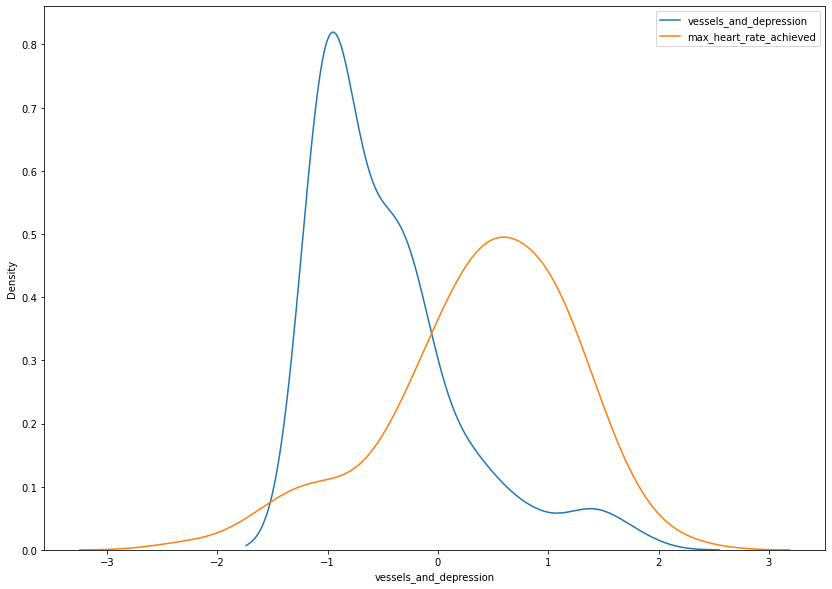

In [264]:
hd_normalized["vessels_and_depression"] = (hd_normalized["num_major_vessels"] + hd_normalized["st_depression"])

normalize = ["vessels_and_depression", "max_heart_rate_achieved"]

for i in normalize:
    hd_normalized[i] = (hd_normalized[i] - hd_normalized[i].mean()) / hd_normalized[i].std()

fig, ax = plt.subplots(1, 1, figsize = (14, 10))

for i in normalize:
    sns.kdeplot(x = hd_normalized[hd_normalized["target"] == 1][i], ax = ax)
plt.legend(normalize)
plt.show()


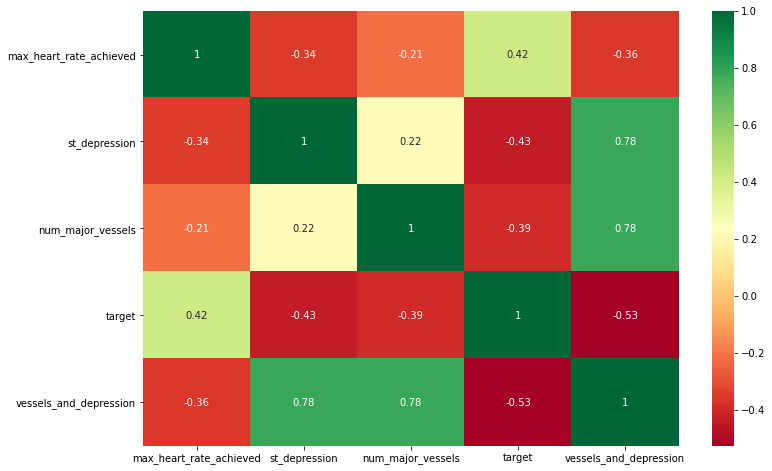

In [265]:
plt.figure(figsize = (12, 8))
sns.heatmap(hd_normalized.corr(), cmap = "RdYlGn", annot = True)
plt.show()

그래프가 100% 맘에 들지는 않지만 이를 나름대로 해석해보면..
- num_major_vessels와 depression : 주요 혈관 수와 depression 수치가 적을수록, Typical Angina에 걸리지 않는 경향이 존재
- 새로 만든 vessels_and_depression의 target과의 상관관계를 보면 더 높아진 것을 알 수 있다!
- max_heart_rate_achieved가 높을수록 Typical Angina에 걸리는 경향이 존재
- 주요 혈관이 적음 -> 혈관의 혈류 운반량 감소 -> 심장병 가능성 상승
- 여기서 depression은 우울이 아니라 ST depression induced by exercise relative to rest인데.. 이에 대해 검색을 좀 해봤더니 심근에 대한 signal이라고 받아 들일 수 있다고 한다.
- 원인이 허혈이나 관상 동맥 부족이라고 하니.. -> 이것 또한 혈관의 혈류 운반량 감소로 인한 심장병 가능성 상승이란 가설을 세울 수 있겠다.
- max_heart_rate_achieved는 최대 심장 박동 수인데.. 심장 박동이란 것은 혈류를 몸에 전달하기 위한 기능이니까, 한번 펌프질 할때 몸에서 필요한 만큼 공급이 안되니까 박동을 정상 수준보다 빠르게 진행을 하게 된다는 것을 의미하는 것 같다.
- 아마 최대 심장 박동 수가 높다는 것이 심장의 기능이 부족함을 의미하는 거지 않을까 싶다!